In [1]:
url = "https://assets-decodeurs.lemonde.fr/decodeurs/assets/[D%C3%A9codeurs]%20Liste%20des%20missions%20de%20conseil/[De%CC%81codeurs]_Consultocratie___la_liste_des_missions_-_Listes_des_missions.csv"

In [34]:
import pandas as pd
import seaborn as sns

In [87]:
sns.set_theme()
# sns.set_palette("rocket")

In [35]:
def pretty(styler):
    styler.format(precision=2, thousands=" ")
    return styler

In [4]:
pd.set_option("display.float_format", lambda x: '{:,.2f}'.format(x).replace(",", " "))

In [5]:
df = pd.read_csv(url, dtype="string")

In [6]:
missions = (df
    .assign(**{
        "Montant (€)": lambda df: df["Montant (€)"].str.replace(" ","")
    })
    .astype({
        "Montant (€)": "float64"
    })
)

missions.dtypes

Source                     string
Intitulé court             string
Intitulé long              string
Détails                    string
Catégorie                  string
Acheteur                   string
Ministère rattachement     string
Type entité                string
Cabinet attributaire       string
Année                      string
Date d'attribution         string
Montant (€)               float64
HT ou TTC                  string
lien source                string
dtype: object

In [7]:
missions.shape

(1583, 14)

In [8]:
missions["Source"].value_counts()

CE       1331
BOAMP     169
DECP       81
Autre       2
Name: Source, dtype: Int64

In [9]:
missions["Ministère rattachement"].value_counts()

Economie                               325
Santé                                  235
Matignon                               205
Armées                                 144
Transformation et Fonction publique    111
Agriculture                            110
Ecologie                                93
Travail                                 87
Justice                                 59
Culture                                 51
Intérieur                               50
Education Nationale                     29
Affaires étrangères                     20
Transformation et Fonction Publique      6
Cohésion des territoires                 5
Enseignement Supérieur                   4
Transports                               1
Name: Ministère rattachement, dtype: Int64

In [10]:
missions["Acheteur"].str.contains("DINUM")

0       False
1       False
2       False
3       False
4       False
        ...  
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Acheteur, Length: 1583, dtype: boolean

In [11]:
dinum = (missions
    [ missions["Acheteur"].str.contains("DINUM") ]
)

dinum.sample().T

,1344
Source,CE
Intitulé court,Conseil et expertise informatique
Intitulé long,Conseil et expertise SI (DINSIC) - LOT 5\nAttr...
Détails,<NA>
Catégorie,Accompagnement de projets
Acheteur,Direction interministérielle du numérique (DIN...
Ministère rattachement,Matignon
Type entité,Ministère
Cabinet attributaire,Aerial
Année,2018


In [12]:
dinum['Montant (€)'].sum()

34864245.0

In [13]:
(missions
 .groupby("Acheteur")
 .sum()
 .sort_values(by="Montant (€)", ascending=False)
)

,Montant (€)
Acheteur,
Caisse des Dépôts et Consignations,392 097 653.00
UGAP,217 000 000.00
Services du Premier Ministre,100 288 200.00
Ministère des armées,98 440 554.00
Ministère de l'économie,69 988 814.00
...,...
ARS de Corse,0.00
Direction générale des entreprises du ministèr...,0.00
Ministère de la Transition écologique,0.00


In [14]:
(missions
    [["Montant (€)"]]
    .sum()
)

Montant (€)   1 996 076 659.00
dtype: float64

In [15]:
(missions
    .groupby("Source")
    [["Montant (€)"]]
    .sum()
    .sort_values(by=["Montant (€)"], ascending=False)
    .style
        .pipe(pretty)
        .bar(subset="Montant (€)")

)

,Montant (€)
Source,
BOAMP,1 041 271 910.00
CE,923 494 086.00
DECP,30 402 025.00
Autre,908 638.00


In [16]:
missions_montant_na = (missions
    [ missions[ "Montant (€)" ].isna() ]
)

In [17]:
(missions_montant_na
    ["Ministère rattachement"]
    .value_counts()
)

Agriculture               96
Ecologie                   9
Education Nationale        3
Santé                      3
Armées                     1
Culture                    1
Economie                   1
Enseignement Supérieur     1
Name: Ministère rattachement, dtype: Int64

In [18]:
(missions
     .groupby(["Ministère rattachement"])
     .sum()
     .sort_values(by="Montant (€)", ascending=False)
     .style
         .pipe(pretty)
         .bar(subset="Montant (€)")
)

,Montant (€)
Ministère rattachement,
Economie,212 739 566.00
Matignon,181 982 876.00
Armées,180 739 017.00
Intérieur,171 051 786.00
Education Nationale,114 485 714.00
Santé,102 281 264.00
Agriculture,87 176 486.00
Travail,76 216 462.00
Ecologie,51 613 892.00


In [19]:
missions["Ministère rattachement"].value_counts()

Economie                               325
Santé                                  235
Matignon                               205
Armées                                 144
Transformation et Fonction publique    111
Agriculture                            110
Ecologie                                93
Travail                                 87
Justice                                 59
Culture                                 51
Intérieur                               50
Education Nationale                     29
Affaires étrangères                     20
Transformation et Fonction Publique      6
Cohésion des territoires                 5
Enseignement Supérieur                   4
Transports                               1
Name: Ministère rattachement, dtype: Int64

In [20]:
missions_education = (missions
    [ missions["Ministère rattachement"] == "Education Nationale" ]
)

missions_education.shape

(29, 14)

In [21]:
missions_education[["Montant (€)"]].sum()

Montant (€)   114 485 714.00
dtype: float64

In [22]:
multiattributaires = (missions
    [missions["Cabinet attributaire"].str.contains(';')]
)

multiattributaires.shape

(139, 14)

In [23]:
multiattributaires[["Montant (€)"]].sum()

Montant (€)   950 201 723.00
dtype: float64

In [24]:
(multiattributaires["Montant (€)"]
    .isna()
    .sum()
)

12

In [25]:
(multiattributaires
    [multiattributaires["Montant (€)"].isna()]
)

,Source,Intitulé court,Intitulé long,Détails,Catégorie,Acheteur,Ministère rattachement,Type entité,Cabinet attributaire,Année,Date d'attribution,Montant (€),HT ou TTC,lien source
1507,CE,Prestations informatiques,Prestations techniques pour la création du sit...,Marché interministériel,Prestations informatiques,<NA>,Agriculture,Ministère,Ut7;Scopyleft,2020,2020,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1529,CE,Marché public pour contractualisation de projet,"Accompagnement de projets, marchés publics pou...",Marché interministériel,Accompagnement de projets,<NA>,Agriculture,Ministère,Tasmane;Pyxis Support,2021,2021,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1542,CE,Prestations informatiques,Prestations techniques pour la création du sit...,Marché interministériel,Prestations informatiques,<NA>,Agriculture,Ministère,Ut7;Scopyleft,2021,2021,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1543,CE,Prestations informatiques,"Expertise technique, développement",Marché interministériel,Prestations informatiques,<NA>,Agriculture,Ministère,Atol Conseils Et Developpements;Seenovate,2021,2021,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1549,CE,Prestations informatiques,Prestations techniques,Marché interministériel,Prestations informatiques,<NA>,Agriculture,Ministère,Atol Conseils Et Developpements;Seenovate,2021,2021,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1575,CE,Accompagnement de la transformation de l'actio...,Accompagnement de la conception et la mise en ...,marché interministériel,Accompagnement de projets,<NA>,Education Nationale,Ministère,Roland Berger;Wavestone;BCG;EY;McKinsey;Accenture,2018,2018,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1576,CE,Accompagnement de la transformation de l'actio...,Accompagnement de la conception et la mise en ...,marché interministériel,Accompagnement de projets,<NA>,Education Nationale,Ministère,EY;BCG;Eurogroup;CM International;Sémaphores;I...,2018,2018,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1577,CE,Accompagnement de la transformation de l'actio...,Accompagnement de la conception et la mise en ...,Marché interministériel,Accompagnement de projets,<NA>,Education Nationale,Ministère,Capgemini;Mazars;Sia Partners;Eurogroup;CM Int...,2018,2018,NaN,TTC,http://www.senat.fr/commission/enquete/2021_in...
1579,DECP,Elaboration du schéma directeur régional des s...,Assistance à maîtrise d'ouvrage pour l'accompa...,<NA>,Accompagnement de projets,ARS de Corse,Santé,Ministère|Local,Capgemini Consulting;Mazars,2017,2017-12-07,NaN,HT,<NA>
1580,DECP,Assistance à maîtrise d'ouvrage relative à l'a...,Assistance à maîtrise d'ouvrage visant à déplo...,<NA>,Accompagnement de projets,ARS Occitanie,Santé,Ministère|Local,Eurl Ir@Conseil;PWC,2017,2017-07-23,NaN,HT,<NA>


In [74]:
categories_dist = (missions
     .groupby(["Catégorie"])
     .sum()
     .sort_values(by="Montant (€)", ascending=False)
     .style
         .pipe(pretty)
         .bar(subset="Montant (€)")
)

categories_dist

,Montant (€)
Catégorie,
Accompagnement de projets,764 752 791.00
Conseil en stratégie,455 620 491.00
Prestations informatiques,429 945 220.00
Inconnu,186 498 800.00
Études,74 036 027.00
Conseil en organisation,65 224 679.00
Formation/coaching,10 228 202.00
Finances,5 385 414.00
Juridique,4 385 035.00


In [63]:
(missions
    .pivot_table(index="Ministère rattachement", values="Montant (€)", aggfunc="sum")
    .sort_values(by="Montant (€)", ascending=False)
)

,Montant (€)
Ministère rattachement,
Economie,212 739 566.00
Matignon,181 982 876.00
Armées,180 739 017.00
Intérieur,171 051 786.00
Education Nationale,114 485 714.00
Santé,102 281 264.00
Agriculture,87 176 486.00
Travail,76 216 462.00
Ecologie,51 613 892.00


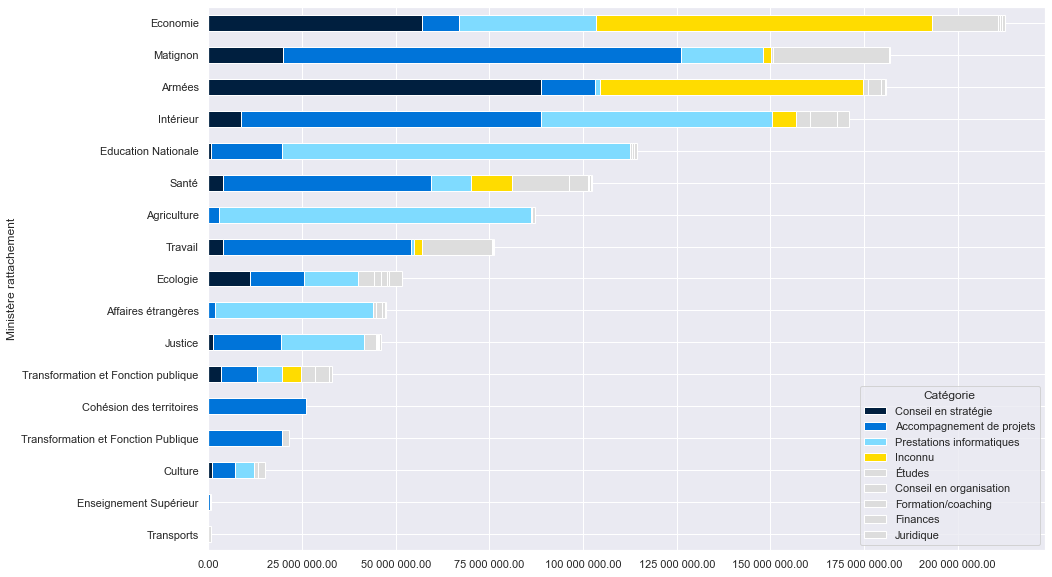

In [114]:
(missions
    .pivot_table(index="Ministère rattachement", columns="Catégorie", values="Montant (€)", aggfunc="sum")
    .reindex((missions
        .pivot_table(index="Ministère rattachement", values="Montant (€)", aggfunc="sum")
        .sort_values(by="Montant (€)", ascending=True)
        .index
    ))
    .reindex(list(reversed(categories_dist.index[:2]))+list(categories_dist.index[2:]), axis=1)
    .plot
    .barh(stacked=True, figsize=(15,10), color=["#001f3f", "#0074D9", "#7FDBFF", "#FFDC00"]+ [ "#DDDDDD" for c in  categories_dist.index[1:]])
    .xaxis.set_major_formatter(lambda x, pos: '{:,.f}'.format(x).replace(",", " "))
    # .legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
)